# Hunches, Hypotheses, and Exploratory Data Analysis with Pandas
    
## Part II.

As part of your [homework for today](https://github.com/sceckert/IntroDHFall2022/blob/main/_week7/homework-5.md), you've already loaded up the three CSV files from Hannah Anderson and Matt Daniels' ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/).  Now we're going to try and test out some our our hypotheses, and practice exploratory analysis. We're going to learn how to transform data, peform basic stastitical calculations, and create data visualizations that allow us to test our our research hypotheses.

In [4]:
! pwd

/Users/sceckert/Desktop/Deskspace/Fall-2022/Introduction-to-DH-Fall-2022/IntroDHFall2022/_week7


In [2]:
# Import pandas
import pandas as pd

In [3]:
# Load in our CSVS, making sure to specify the encoding as "ISO-8859-1"
character_mapping = pd.read_csv('../_datasets/pudding-film-dialogue-data/character_mapping.csv', encoding = "ISO-8859-1")
character_list = pd.read_csv('../_datasets/pudding-film-dialogue-data/character_list5.csv', encoding = "ISO-8859-1")
film_scripts = pd.read_csv('../_datasets/pudding-film-dialogue-data/pudding_public_scripts.csv', encoding = "ISO-8859-1")


### Inspecting our data

In [6]:
film_scripts.head()

,imdb_id,script_id,title,year,gross (inflation-adjusted),link
0,tt0019777,4031,The Cocoanuts,1929,NaN,http://www.pages.drexel.edu/~ina22/splaylib/Sc...
1,tt0021884,8521,Frankenstein,1931,298.0,Frankenstein (Florey & Fort) [1931-5-23] [Scan...
2,tt0022054,1086,The Last Flight,1931,NaN,"film_20100519/all_imsdb_05_19_10/Last-Flight,-..."
3,tt0022626,1631,American Madness,1932,NaN,http://www.imsdb.com/Movie Scripts/American Ma...
4,tt0022958,2438,Grand Hotel,1932,NaN,http://www.imsdb.com/Movie Scripts/Grand Hotel...


In [7]:
character_list

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0
...,...,...,...,...,...
23043,9254,lumiere,1063,m,56.0
23044,9254,maurice,1107,m,71.0
23045,9254,monsieur d'arqu,114,m,58.0
23046,9254,mrs. potts,564,f,66.0


In [8]:
film_scripts.groupby('year').describe()

script_id                                                              \
         count         mean          std     min      25%     50%      75%   
year                                                                         
1929       1.0  4031.000000          NaN  4031.0  4031.00  4031.0  4031.00   
1931       2.0  4803.500000  5257.338918  1086.0  2944.75  4803.5  6662.25   
1932       4.0  3610.000000  1849.000631  1631.0  2236.25  3796.0  5169.75   
1933       3.0  4574.666667  3651.575596   873.0  2775.00  4677.0  6425.50   
1934       2.0  5131.000000    22.627417  5115.0  5123.00  5131.0  5139.00   
...        ...          ...          ...     ...      ...     ...      ...   
2011      84.0  4493.952381  2502.643282  1530.0  2545.75  3353.5  6842.75   
2012      70.0  5100.771429  2329.238341  1659.0  2984.00  5388.5  6883.75   
2013      72.0  5815.000000  2270.863346  1286.0  4317.50  6046.5  7687.25   
2014      80.0  6486.950000  1604.436696  1716.0  5476.50  6625.5  7739.00   
2015      62.0  6785.629032  1272.463742  5380.0  5463.25  7340.5  7928.00   

             gross (inflation-adjusted)                                 \
         max                      count        mean         std    min   
year                                                                     
1929  4031.0                        0.0         NaN         NaN    NaN   
1931  8521.0                        1.0  298.000000         NaN  298.0   
1932  5217.0                        0.0         NaN         NaN    NaN   
1933  8174.0                        0.0         NaN         NaN    NaN   
1934  5147.0                        0.0         NaN         NaN    NaN   
...      ...                        ...         ...         ...    ...   
2011  9241.0                       79.0   54.202532   54.672306    0.0   
2012  9111.0                       60.0   88.133333  124.760308    0.0   
2013  9247.0                       64.0   75.609375   90.777177    0.0   
2014  9230.0                       69.0   60.275362   73.953062    0.0   
2015  8614.0                       47.0   74.638298  151.522193    0.0   

                                    
         25%    50%     75%    max  
year                                
1929     NaN    NaN     NaN    NaN  
1931  298.00  298.0  298.00  298.0  
1932     NaN    NaN     NaN    NaN  
1933     NaN    NaN     NaN    NaN  
1934     NaN    NaN     NaN    NaN  
...      ...    ...     ...    ...  
2011   13.00   40.0   79.50  209.0  
2012   13.75   44.5  118.00  680.0  
2013   13.25   40.0  110.25  429.0  
2014   11.00   33.0   91.00  372.0  
2015    7.00   27.0   68.00  927.0  

[81 rows x 16 columns]

----

### Make a simple scatter plot

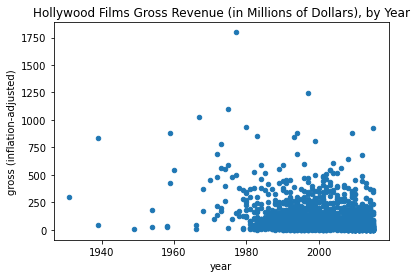

In [9]:
film_scripts.plot.scatter(x= 'year', y='gross (inflation-adjusted)', title='Hollywood Films Gross Revenue (in Millions of Dollars), by Year')

### Create a new dataframe based on a calculations performed on another dataframe 
To get the total dialogue, we need to sum up all the words spoken by characters in the same script. To do this, we can create a new dataframe ("total_dialogue_by_film), use `groupby` to group our character_list dataframe by "script_id", filter to select only the column 'words', take the `sum` of all those words, and rename the column "total_dialogue".

In [10]:
# Create a new dataframe with script ids and total amount of dialogue for that script
total_dialogue_by_film = character_list.groupby('script_id')['words'.sum]().reset_index(name = 'total_dialogue')
total_dialogue_by_film = total_dialogue_by_film.sort_values('total_dialogue')
total_dialogue_by_film

,script_id,total_dialogue
771,3161,1175
1092,4460,1186
1004,4125,1375
1360,5499,1387
1095,4473,1405
...,...,...
682,2821,41490
310,1538,42338
544,2352,43874
636,2682,58832


### Merging two dataframes
Now we have a dataframe of script_ids and total dialogue counts and another dataframe with lots of other metadata about that script. Since the script_ids are unique to each scrip, we can use them as keys to merge them. 

Below, we merge our total_dialogue_by_film and film_scripts dataframes, using the 'script_id' as the key.

In [11]:
dialogue_year = pd.merge(total_dialogue_by_film, film_scripts, on='script_id')
dialogue_year.head()

,script_id,total_dialogue,imdb_id,title,year,gross (inflation-adjusted),link
0,3161,1175,tt0239860,Quantum Project,2000,NaN,http://www.dailyscript.com/scripts/quantumproj...
1,4460,1186,tt0298388,Jonah: A VeggieTales Movie,2002,38.0,http://www.scifiscripts.com/cartoon/Jonah_Scri...
2,4125,1375,tt0112887,The Doom Generation,1995,NaN,http://www.awesomefilm.com/script/thedoomgener...
3,5499,1387,tt3808342,Son of Saul,2015,0.0,http://gointothestory.blcklst.com/wp-content/u...
4,4473,1405,tt0116768,Kids in the Hall: Brain Candy,1996,5.0,http://www.kithfan.org/work/transcripts/brainc...


### Make a scatterplot plotting each script's total dialogue, by year

What if we wanted to test out our hunches about the relationships between the year of release and total dialogue? We could try and plot our results!

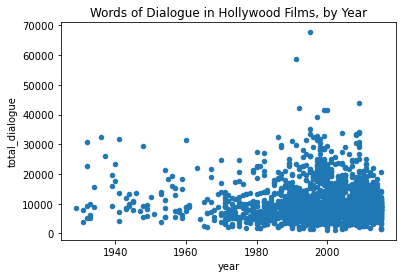

In [12]:
dialogue_year.plot.scatter(x = "year", y = "total_dialogue", title="Words of Dialogue in Hollywood Films, by Year")

### Make a scatterplot plotting each script's total dialogue, by gross revenue

We can also test out our hypotheses aobut whether there is any relationship between the film's gross value and the amount of dialogue in the film.

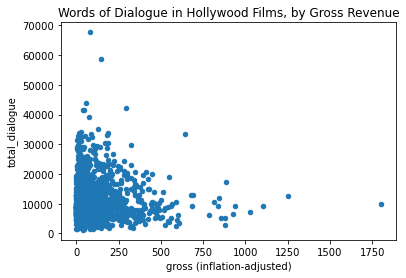

In [13]:
# First we can filter out all the datapoints = 0
dialogue_gross = dialogue_year[dialogue_year['gross (inflation-adjusted)'] >= 0]
dialogue_gross.plot.scatter(x = "gross (inflation-adjusted)", y = "total_dialogue", title='Words of Dialogue in Hollywood Films, by Gross Revenue')

### Merging our character data and film dialogue data

In [14]:
character_film_data = pd.merge(character_list, dialogue_year, on='script_id')

In [15]:
character_film_data

,script_id,imdb_character_name,words,gender,age,total_dialogue,imdb_id,title,year,gross (inflation-adjusted),link
0,280,betty,311,f,35.0,6394,tt0112579,The Bridges of Madison County,1995,142.0,http://www.awesomefilm.com/script/bomc.txt
1,280,carolyn johnson,873,f,NaN,6394,tt0112579,The Bridges of Madison County,1995,142.0,http://www.awesomefilm.com/script/bomc.txt
2,280,eleanor,138,f,NaN,6394,tt0112579,The Bridges of Madison County,1995,142.0,http://www.awesomefilm.com/script/bomc.txt
3,280,francesca johns,2251,f,46.0,6394,tt0112579,The Bridges of Madison County,1995,142.0,http://www.awesomefilm.com/script/bomc.txt
4,280,madge,190,f,46.0,6394,tt0112579,The Bridges of Madison County,1995,142.0,http://www.awesomefilm.com/script/bomc.txt
...,...,...,...,...,...,...,...,...,...,...,...
23043,9254,lumiere,1063,m,56.0,10159,tt0101414,Beauty and the Beast,1991,452.0,http://www.fpx.de/fp/Disney/Scripts/BeautyAndT...
23044,9254,maurice,1107,m,71.0,10159,tt0101414,Beauty and the Beast,1991,452.0,http://www.fpx.de/fp/Disney/Scripts/BeautyAndT...
23045,9254,monsieur d'arqu,114,m,58.0,10159,tt0101414,Beauty and the Beast,1991,452.0,http://www.fpx.de/fp/Disney/Scripts/BeautyAndT...
23046,9254,mrs. potts,564,f,66.0,10159,tt0101414,Beauty and the Beast,1991,452.0,http://www.fpx.de/fp/Disney/Scripts/BeautyAndT...


In [16]:
character_film_data['gender'].value_counts()

m    16132
f     6911
?        5
Name: gender, dtype: int64

### Add a column based on calculations performed on other columns
We're going to add a column calculating each character's "proportion_of_dialogue", which calculates the number of words they speak a s a proportion of the total dialogue

In [17]:
character_film_data['proportion_of_dialogue'] = character_film_data['words'] / character_film_data['total_dialogue']

### Creating new dataframes by filtering our dataframe by values
We're going to create two new dataframes of men and women, one of characters labled "m" and "f" in the dataset. (Note: does this capture all of our characters? Look back at what values we have in the 'gender' column. What might we miss?

In [18]:
men_character_film_data = character_film_data[character_film_data['gender'] == 'm']
women_character_film_data = character_film_data[character_film_data['gender'] == 'f']

In [19]:
men_character_film_data

,script_id,imdb_character_name,words,gender,age,total_dialogue,imdb_id,title,year,gross (inflation-adjusted),link,proportion_of_dialogue
5,280,michael johnson,723,m,38.0,6394,tt0112579,The Bridges of Madison County,1995,142.0,http://www.awesomefilm.com/script/bomc.txt,0.113075
6,280,robert kincaid,1908,m,65.0,6394,tt0112579,The Bridges of Madison County,1995,142.0,http://www.awesomefilm.com/script/bomc.txt,0.298405
7,623,bobby korfin,328,m,NaN,9108,tt0179626,15 Minutes,2001,37.0,film_20100519/all_imsdb_05_19_10/15-Minutes.html,0.036012
9,623,deputy chief fi,347,m,NaN,9108,tt0179626,15 Minutes,2001,37.0,film_20100519/all_imsdb_05_19_10/15-Minutes.html,0.038098
10,623,detective eddie,2020,m,58.0,9108,tt0179626,15 Minutes,2001,37.0,film_20100519/all_imsdb_05_19_10/15-Minutes.html,0.221783
...,...,...,...,...,...,...,...,...,...,...,...,...
23041,9254,gaston,1326,m,38.0,10159,tt0101414,Beauty and the Beast,1991,452.0,http://www.fpx.de/fp/Disney/Scripts/BeautyAndT...,0.130525
23042,9254,lefou,415,m,NaN,10159,tt0101414,Beauty and the Beast,1991,452.0,http://www.fpx.de/fp/Disney/Scripts/BeautyAndT...,0.040850
23043,9254,lumiere,1063,m,56.0,10159,tt0101414,Beauty and the Beast,1991,452.0,http://www.fpx.de/fp/Disney/Scripts/BeautyAndT...,0.104636
23044,9254,maurice,1107,m,71.0,10159,tt0101414,Beauty and the Beast,1991,452.0,http://www.fpx.de/fp/Disney/Scripts/BeautyAndT...,0.108967


In [20]:
women_character_film_data

,script_id,imdb_character_name,words,gender,age,total_dialogue,imdb_id,title,year,gross (inflation-adjusted),link,proportion_of_dialogue
0,280,betty,311,f,35.0,6394,tt0112579,The Bridges of Madison County,1995,142.0,http://www.awesomefilm.com/script/bomc.txt,0.048639
1,280,carolyn johnson,873,f,NaN,6394,tt0112579,The Bridges of Madison County,1995,142.0,http://www.awesomefilm.com/script/bomc.txt,0.136534
2,280,eleanor,138,f,NaN,6394,tt0112579,The Bridges of Madison County,1995,142.0,http://www.awesomefilm.com/script/bomc.txt,0.021583
3,280,francesca johns,2251,f,46.0,6394,tt0112579,The Bridges of Madison County,1995,142.0,http://www.awesomefilm.com/script/bomc.txt,0.352049
4,280,madge,190,f,46.0,6394,tt0112579,The Bridges of Madison County,1995,142.0,http://www.awesomefilm.com/script/bomc.txt,0.029715
...,...,...,...,...,...,...,...,...,...,...,...,...
23028,9253,girl in pool,118,f,NaN,3353,tt1228987,Let Me In,2010,13.0,http://www.pages.drexel.edu/~ina22/splaylib/Sc...,0.035192
23034,9253,owen's mother,286,f,39.0,3353,tt1228987,Let Me In,2010,13.0,http://www.pages.drexel.edu/~ina22/splaylib/Sc...,0.085297
23038,9254,belle,2183,f,35.0,10159,tt0101414,Beauty and the Beast,1991,452.0,http://www.fpx.de/fp/Disney/Scripts/BeautyAndT...,0.214883
23046,9254,mrs. potts,564,f,66.0,10159,tt0101414,Beauty and the Beast,1991,452.0,http://www.fpx.de/fp/Disney/Scripts/BeautyAndT...,0.055517


## Bonus: Let's visualize our data!

### First, let's make some static visualizations
We're going to visualize  the proportion of dialogue that women and men speak in hollywood fimls

In [21]:
# We're going to import a plotting library called matplotlib
import matplotlib.ticker as mtick

In [22]:
women_dialogue_df = women_character_film_data.groupby(['title', 'year'])[['proportion_of_dialogue']].sum()\
.sort_values(by='proportion_of_dialogue', ascending=False).reset_index()

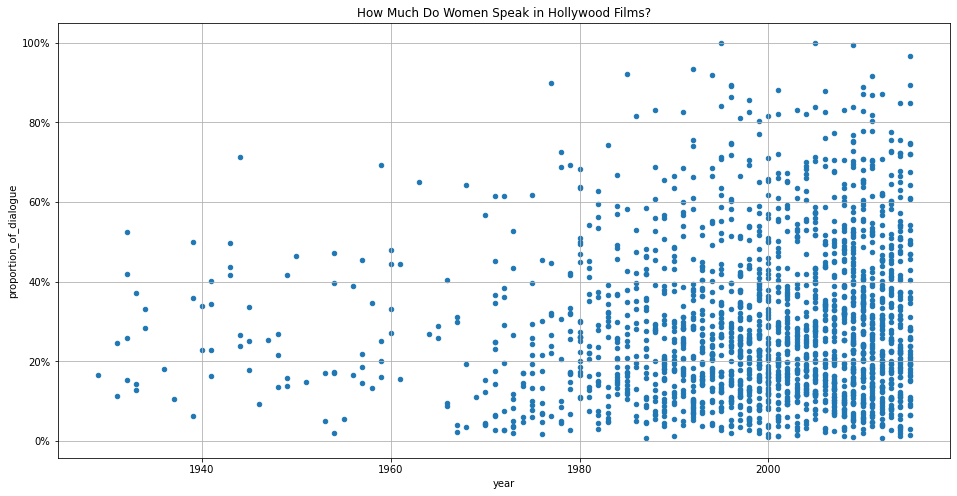

In [23]:
ax = women_dialogue_df.plot.scatter(x='year', y='proportion_of_dialogue', figsize=(16, 8), grid=True,\
                               title="How Much Do Women Speak in Hollywood Films?")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

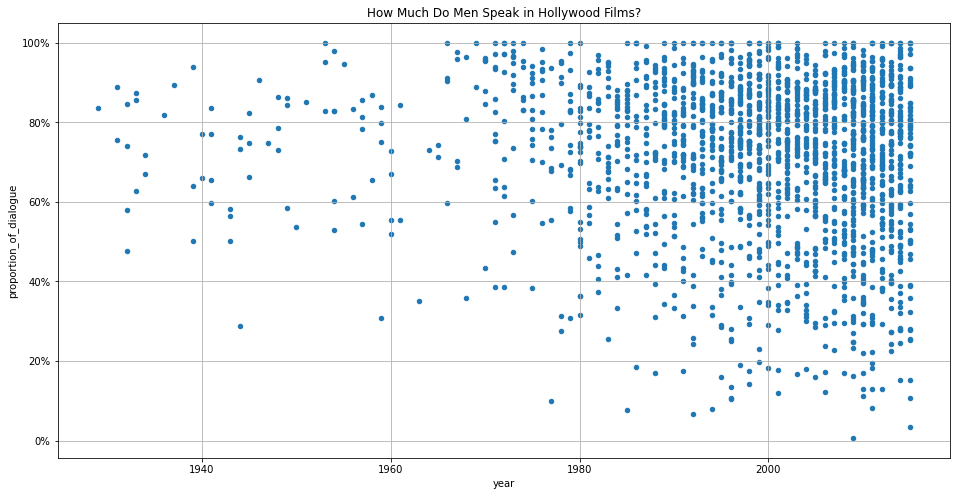

In [24]:
men_dialogue_df = men_character_film_data.groupby(['title', 'year'])[['proportion_of_dialogue']].sum()\
.sort_values(by='proportion_of_dialogue', ascending=False).reset_index()
ax = men_dialogue_df.plot.scatter(x='year', y='proportion_of_dialogue', figsize=(16, 8), grid=True,\
                             title="How Much Do Men Speak in Hollywood Films?")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

### Now, let's make some interactive visualizations
We're going to use a Python statistical visualization library called Altair (which is part of Anaconda), which we'll be learning more about in future lessons.

In [25]:
#If you're running this on your local machine, uncomment the following
#!pip install altair

In [26]:
import altair as alt

In [27]:
## Let's make an interactive visualization of our data
alt.Chart(women_dialogue_df, title='How Much Do Women Speak in Hollywood Films?').mark_circle(size=70).encode(
   alt.X('year:Q', axis=alt.Axis(format='', title='Release Year'),
        scale=alt.Scale(domain=(1920, 2020))
    ),
    alt.Y('proportion_of_dialogue', axis=alt.Axis(format='%', title='Amount of Dialogue Spoken by Women')),
    tooltip=['title', 'year', alt.Tooltip('proportion_of_dialogue:Q', format='.1%')]
).interactive().properties(width=800, height=500)

alt.Chart(...)

In [28]:
alt.Chart(men_dialogue_df, title='How Much Do Men Speak in Hollywood Films?').mark_circle(size=70).encode(
   alt.X('year:Q', axis=alt.Axis(format='', title='Release Year'),
        scale=alt.Scale(domain=(1920, 2020)), 
    ),
     alt.Y('proportion_of_dialogue:Q', axis=alt.Axis(format='%', title='Amount of Dialogue Spoken by Men')),
    tooltip=['title', 'year', alt.Tooltip('proportion_of_dialogue:Q', format='.1%')]
).interactive().properties(width=800, height=500)

alt.Chart(...)

### Saving a chart in altair as an HTML file
If you right click at the top of one of the above charts, you'll be able to download the chart as a static image. But what if we wanted to save an *interactive* version? To save a chart made in altair as an HTML file, simply use the `.save('your-name-for-your-chart.html')` operation. For instance, we could add `.save('chart1.html')` at the end of the previous file, like below. Click on the cell below and run it:

In [30]:
alt.Chart(men_dialogue_df, title='How Much Do Men Speak in Hollywood Films?').mark_circle(size=70).encode(
   alt.X('year:Q', axis=alt.Axis(format='', title='Release Year'),
        scale=alt.Scale(domain=(1920, 2020)), 
    ),
     alt.Y('proportion_of_dialogue:Q', axis=alt.Axis(format='%', title='Amount of Dialogue Spoken by Men')),
    tooltip=['title', 'year', alt.Tooltip('proportion_of_dialogue:Q', format='.1%')]
).interactive().properties(width=800, height=500).save('chart1.html')

 Check over in the lefthand panel of files in this directory. You should see a new file called "chart1.html".  Right click on the file to download it to your destop. You now have an HTML interactive version of the chart you just made that you can open in your webbrowser.